In [18]:
# from utils import *
# data = dl_input(12)
# data
with open('12/input.txt', 'r') as f:
    data = f.read()


In [19]:
# data = """start-A
# start-b
# A-c
# A-b
# b-d
# A-end
# b-end"""

In [20]:
data.split('\n')

['dr-of',
 'start-KT',
 'yj-sk',
 'start-gb',
 'of-start',
 'IJ-end',
 'VT-sk',
 'end-sk',
 'VT-km',
 'KT-end',
 'IJ-of',
 'dr-IJ',
 'yj-IJ',
 'KT-yj',
 'gb-VT',
 'dr-yj',
 'VT-of',
 'PZ-dr',
 'KT-of',
 'KT-gb',
 'of-gb',
 'dr-sk',
 'dr-VT']

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

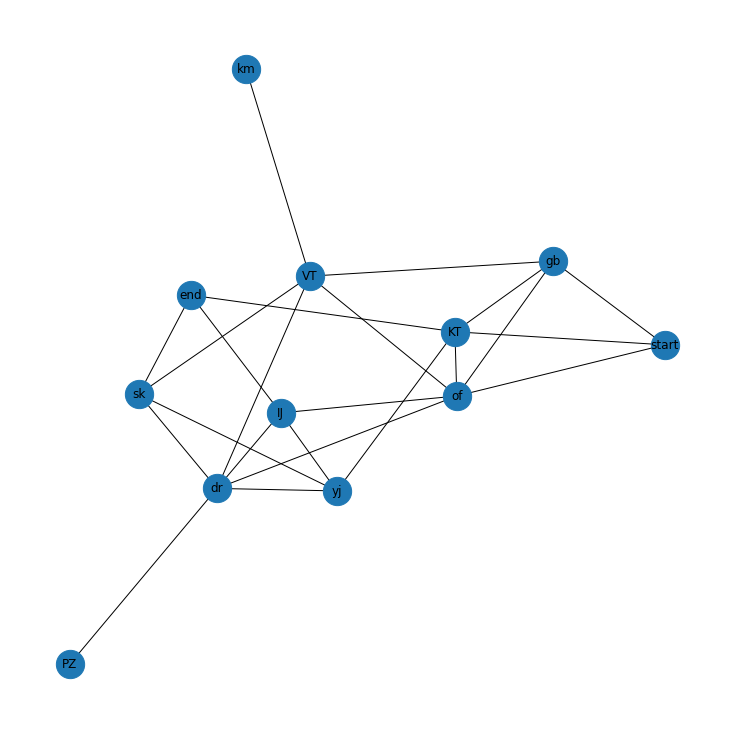

In [35]:
G = nx.Graph(l.split('-') for l in data.split('\n'))

G

plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, node_size=800)

# G = nx.DiGraph([n, n+(a if cmd == 'jmp' else 1), {'acc': (a if cmd == 'acc' else 0)}]
#                for n,(cmd,a) in enumerate(𝓟))

In [34]:
import functools

@functools.cache
def count_paths(G, cur_node, visited = frozenset(), bonus_visit = False):
    if cur_node == 'end':
        return 1
    if cur_node in visited:
        if (not bonus_visit or cur_node == 'start'):
            return 0
        bonus_visit = False
    if cur_node[0].islower():
        visited = visited | set([cur_node])
            
    return sum(count_paths(G, next_node, visited, bonus_visit)
                   for next_node in G.neighbors(cur_node))
        

print('Part 1:', count_paths(G, 'start'))
print('Part 2:', count_paths(G, 'start', bonus_visit = True))

Part 1: 4691
Part 2: 140718


In [32]:
# 1.89 ms ± 44.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
# 705 ms ± 18.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [456]:
import numpy as np
A = np.array([[int(i) for i in l] for l in data.split('\n')])

flashes = 0

for idx in range(1000):
    A += 1
    flashed = A < 0

    while True:
        flashing = A >= 10
        if not flashing.sum():
            break
            
        flashed |= flashing
        F = np.pad(flashing, 1).astype(int)
        A += F[0:-2,0:-2] + F[1:-1,0:-2] + F[2:,0:-2] +\
        F[0:-2,1:-1] + F[1:-1,1:-1] + F[2:,1:-1] +\
        F[0:-2,2:] + F[1:-1,2:] + F[2:,2:]
        
        A[flashed] = 0
    
    flashes += flashed.sum()

    if idx+1 == 100:
        print('Part 1:', flashes)
    if flashed.all():
        print('Part 2:', idx+1)
        break

Part 1: 1637
Part 2: 242


In [468]:
from itertools import combinations

list(combinations(range(-1,2), 2))

[(-1, 0), (-1, 1), (0, 1)]